# Classifikation with k-Nearest Neighbors

In [15]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from pandas import DataFrame
import seaborn as sn

## Random generated data

In [16]:
# Generate a binary classification data

from sklearn.datasets import make_blobs

X_blobs, Y_blobs = make_blobs(n_samples=400, centers=2,
                              n_features=2, random_state=42,
                              cluster_std=2)

print("X =", X_blobs.shape, "Y = ", Y_blobs.shape)

X = (400, 2) Y =  (400,)


In [17]:
print(Y_blobs[:10], "\n",X_blobs[:10])

[1 1 1 0 1 1 1 0 0 0] 
 [[ 6.65246445  0.81938594]
 [ 4.8804701   3.00204735]
 [ 5.06191377  1.77974346]
 [-1.47910225 16.71974911]
 [ 4.32386304  1.11940754]
 [ 4.6767467   2.66833309]
 [ 1.4269862   2.38009696]
 [-2.35758851  7.65996271]
 [-1.03226446  9.35702269]
 [-2.08101013  6.52280857]]


Text(0.5, 0, '$X$')

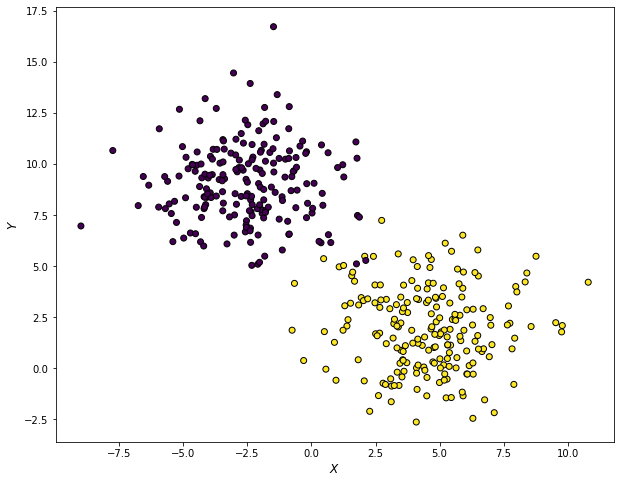

In [18]:
# Visualize the data

plt.figure(figsize=(10, 8))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=Y_blobs, edgecolor="black")
plt.ylabel("$Y$", size=12)
plt.xlabel("$X$", size=12)

In [19]:
# Use K-Nearest-Neighbor
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_blobs, Y_blobs)

KNeighborsClassifier(n_neighbors=2)

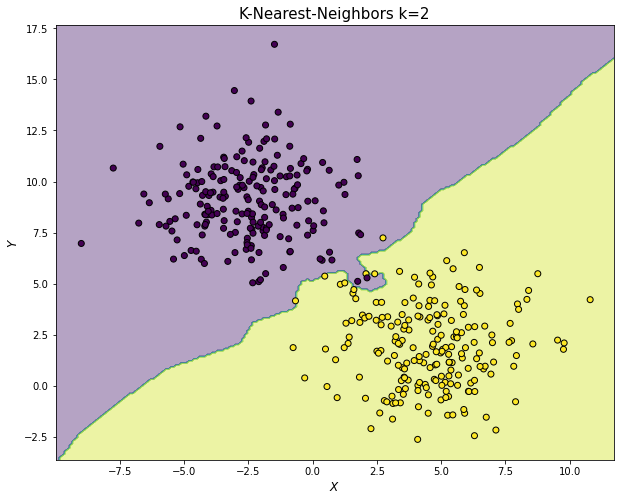

In [20]:
# Create a decision boundary
x_min, x_max = X_blobs[:, 0].min() - 1, X_blobs[:, 0].max() + 1
y_min, y_max = X_blobs[:, 1].min() - 1, X_blobs[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c=Y_blobs, edgecolor="k")
ax.set_ylabel("$Y$", size=12)
ax.set_xlabel("$X$", size=12)
ax.set_title("K-Nearest-Neighbors k=2", size=15)
#plt.savefig("knn_blobs.pdf",dpi = 300, bbox_inches="tight")
plt.show()

# Fundamental Clustering Problem Suite (FCPS)
## EngyTime-Dataset
### Datapreparation

In [21]:
# Some data preperation on EngyTime-Dataset

features = open("../data/EngyTime.lrn", "r")
labels = open("../data/EngyTime.cls", "r")

X_engy=[]
for x in features:
  X_engy.append(x.split("\t"))

Y_engy=[]
for y in labels:
  Y_engy.append(y.split("\t"))

X_engy = np.array(X_engy[4:]).astype(np.float)
Y_engy = np.array(Y_engy[1:]).astype(np.float)

print(X_engy[:2])
print(Y_engy[:2])

[[1.       1.388261 2.076096]
 [2.       2.177247 3.102304]]
[[1. 1.]
 [2. 1.]]


In [22]:
# Remove the first rows and split the data into train- and test-dataset
X_engy = np.delete(X_engy, 0, 1)
Y_engy = np.delete(Y_engy, 0, 1)

X_engy_train, X_engy_test, Y_engy_train, Y_engy_test = train_test_split(X_engy, Y_engy, 
                                                                        test_size=0.5, random_state=0) 
print("Normal-data:\tX=",X_engy.shape,"\tY=",Y_engy.shape)
print("Train-data:\tX=",X_engy_train.shape,"\tY=",Y_engy_train.shape)
print("Test-data:\tX=",X_engy_test.shape,"\tY=", Y_engy_test.shape)

Normal-data:	X= (4096, 2) 	Y= (4096, 1)
Train-data:	X= (2048, 2) 	Y= (2048, 1)
Test-data:	X= (2048, 2) 	Y= (2048, 1)


### Data Visualisation

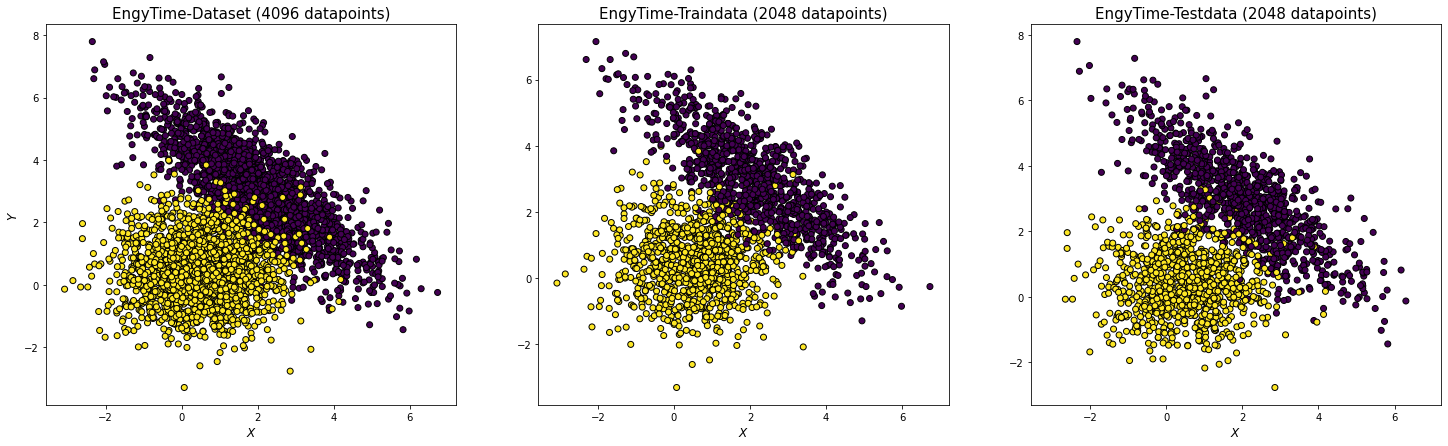

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(25, 7))
ax0, ax1, ax2 = axes.flatten()

ax0.scatter(X_engy[:, 0], X_engy[:, 1], 
            c=Y_engy, edgecolor="black")
ax0.set_ylabel("$Y$", size=12)
ax0.set_xlabel("$X$", size=12)
ax0.set_title("EngyTime-Dataset ({} datapoints)".format(len(X_engy)), size=15)

ax1.scatter(X_engy_train[:, 0], X_engy_train[:, 1], 
            c=Y_engy_train, edgecolor="black")
ax1.set_xlabel("$X$", size=12)
ax1.set_title("EngyTime-Traindata ({} datapoints)".format(len(X_engy_train)), size=15)

ax2.scatter(X_engy_test[:, 0], X_engy_test[:, 1], 
            c=Y_engy_test, edgecolor="black")
ax2.set_xlabel("$X$", size=12)
ax2.set_title("EngyTime-Testdata ({} datapoints)".format(len(X_engy_test)), size=15)

#plt.savefig("engytime-dataset-2.pdf",dpi = 300, bbox_inches="tight")
plt.show()

In [46]:
# Try K-Nearest-Neighbor with 3,7 and 15 neighbors
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_13 = KNeighborsClassifier(n_neighbors=15)

knn_3.fit(X_engy_train, Y_engy_train)
knn_7.fit(X_engy_train, Y_engy_train)
knn_13.fit(X_engy_train, Y_engy_train)

KNeighborsClassifier(n_neighbors=15)

In [31]:
y_pred_3 = knn_3.predict(X_engy_test)
y_pred_7 = knn_7.predict(X_engy_test)
y_pred_13 = knn_13.predict(X_engy_test)

print("k=3:\t",y_pred_3)
print("k=7:\t",y_pred_7)
print("k=13:\t",y_pred_13)

k=3:	 [1. 1. 1. ... 1. 2. 1.]
k=7:	 [1. 1. 1. ... 1. 2. 1.]
k=13:	 [1. 1. 1. ... 1. 2. 1.]


In [32]:
# Calculate Decision boundary
x_min, x_max = X_engy_test[:, 0].min() - 1, X_engy_test[:, 0].max() + 1
y_min, y_max = X_engy_test[:, 1].min() - 1, X_engy_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# k=3
Z_3 = knn_3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_3 = Z_3.reshape(xx.shape)

# k=7
Z_7 = knn_7.predict(np.c_[xx.ravel(), yy.ravel()])
Z_7 = Z_7.reshape(xx.shape)

# k=13
Z_13 = knn_13.predict(np.c_[xx.ravel(), yy.ravel()])
Z_13 = Z_13.reshape(xx.shape)

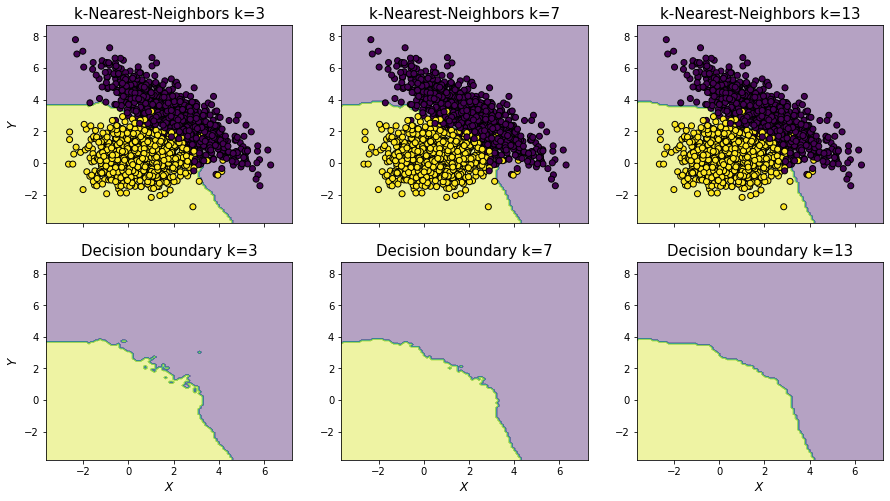

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(15, 8))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()


#### Scatter plots [top (1-3)] ###
ax0.contourf(xx, yy, Z_3, alpha=0.4)
ax0.scatter(X_engy_test[:, 0], X_engy_test[:, 1],
            c=Y_engy_test, edgecolor="k")
ax0.set_ylabel("$Y$", size=12)
ax0.set_title("k-Nearest-Neighbors k=3", size=15)

ax1.contourf(xx, yy, Z_7, alpha=0.4)
ax1.scatter(X_engy_test[:, 0], X_engy_test[:, 1],
            c=Y_engy_test, edgecolor="k")
ax1.set_title("k-Nearest-Neighbors k=7", size=15)


ax2.contourf(xx, yy, Z_13, alpha=0.4)
ax2.scatter(X_engy_test[:, 0], X_engy_test[:, 1],
            c=Y_engy_test, edgecolor="k")
ax2.set_title("k-Nearest-Neighbors k=13", size=15)


### Decision boundary plots [bottom (1-3)] ###
ax3.contourf(xx, yy, Z_3, alpha=0.4)
ax3.set_xlabel("$X$", size=12)
ax3.set_ylabel("$Y$", size=12)
ax3.set_title("Decision boundary k=3", size=15)

ax4.contourf(xx, yy, Z_7, alpha=0.4)
ax4.set_xlabel("$X$", size=12)
ax4.set_title("Decision boundary k=7", size=15)

ax5.contourf(xx, yy, Z_13, alpha=0.4)
ax5.set_xlabel("$X$", size=12)
ax5.set_title("Decision boundary k=13", size=15)
#plt.savefig("knn_engy.pdf",dpi = 300, bbox_inches="tight")
plt.show()

In [34]:
print("score n=3:\t", knn_3.score(X_engy_test, Y_engy_test))
print("score n=7:\t", knn_7.score(X_engy_test, Y_engy_test))
print("score n=15:\t", knn_13.score(X_engy_test, Y_engy_test))

score n=3:	 0.95556640625
score n=7:	 0.9619140625
score n=15:	 0.96337890625


In [37]:
# Calculate the confusion matrix
conf_mat_3 = DataFrame(confusion_matrix(y_pred_3, Y_engy_test))
conf_mat_7 = DataFrame(confusion_matrix(y_pred_7, Y_engy_test))
conf_mat_13 = DataFrame(confusion_matrix(y_pred_13, Y_engy_test))

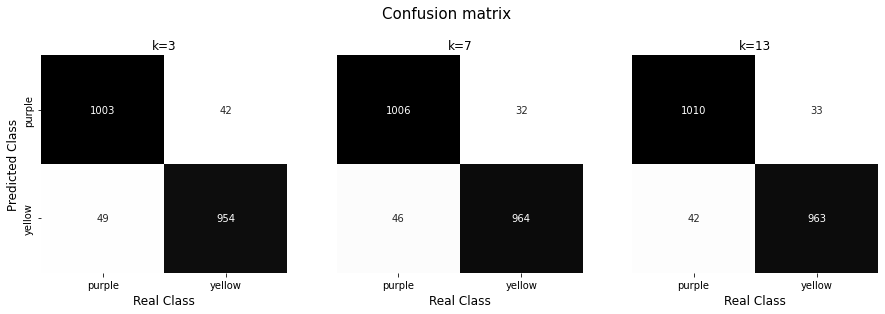

In [45]:
# Plot confusion matrix
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15, 4))
ax0, ax1, ax2 = axes.flatten()
labels=["purple","yellow"]

s1=sn.heatmap(conf_mat_3, cmap='binary', annot=True, fmt="d", ax=ax0, cbar=False, yticklabels=labels)
s2=sn.heatmap(conf_mat_7, cmap='binary', annot=True, fmt="d", ax=ax1, cbar=False, yticklabels="")
s3=sn.heatmap(conf_mat_13, cmap='binary', annot=True, fmt="d", ax=ax2, cbar=False, yticklabels="")
s1.set_xticklabels(labels)

ax0.set_title("k=3")
ax0.set_ylabel("Predicted Class", size=12)
ax0.set_xlabel("Real Class", size=12)
ax1.set_title("k=7")
ax1.set_xlabel("Real Class", size=12)
ax2.set_title("k=13")
ax2.set_xlabel("Real Class", size=12)
fig.suptitle("Confusion matrix", size=15, y=1.05)
#plt.savefig("confusion_matrix.pdf",dpi = 300, bbox_inches="tight")
plt.show()